In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from iclr import *

%matplotlib inline

sns.set_style("whitegrid")

# Color and Marker code

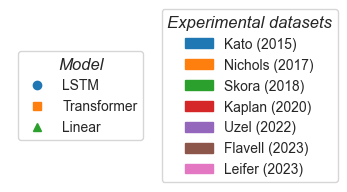

In [4]:
legend_code = legend_code()

# Dataset information

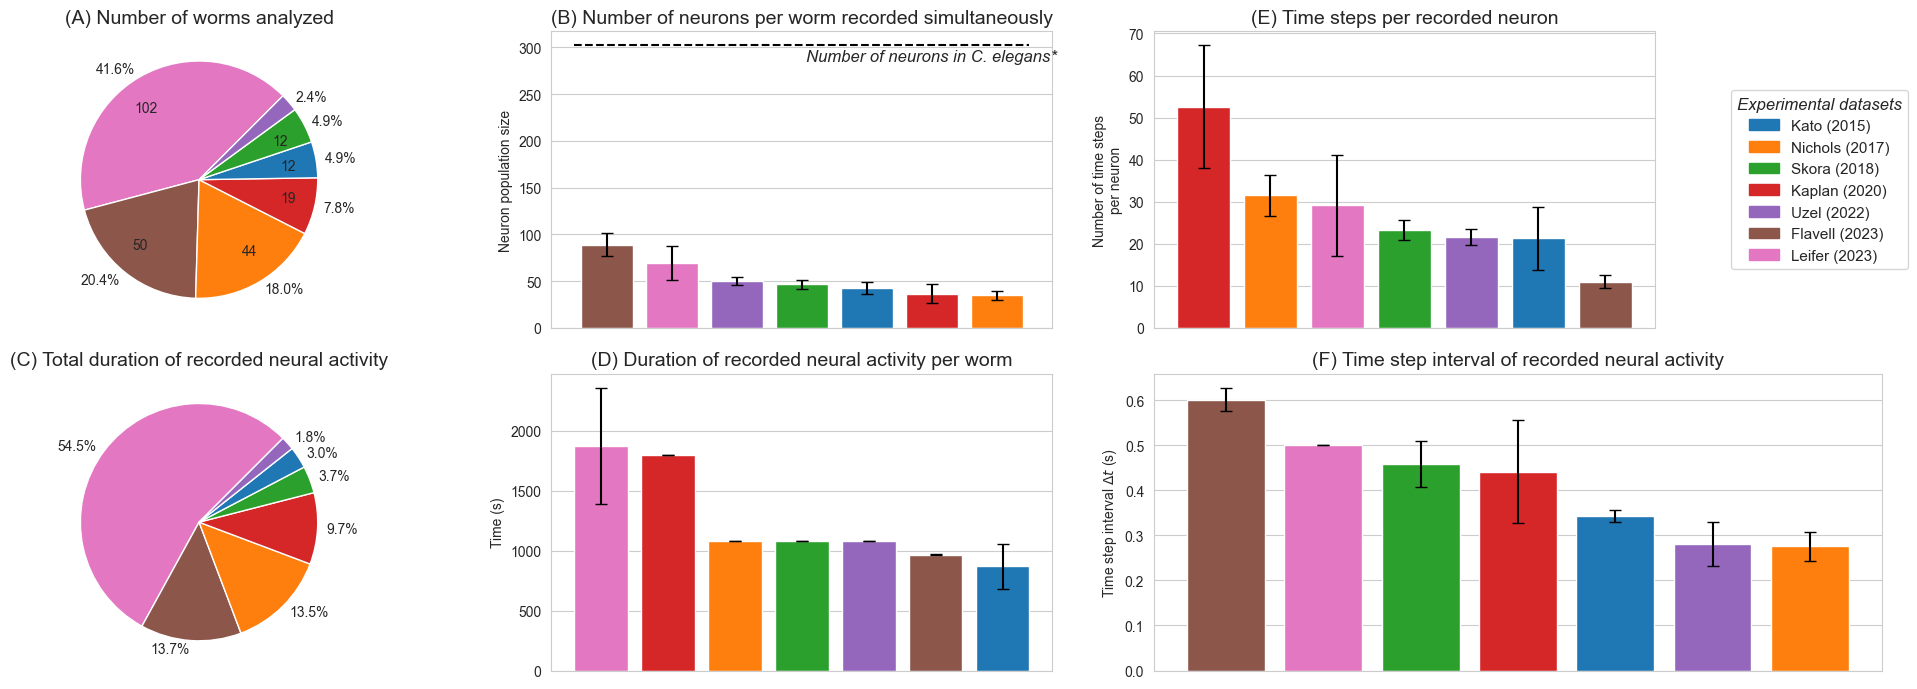

In [5]:
fig1_path_dict = {
    'train_dataset_info': '/home/lrvnc/Projects/worm-graph/logs/results/RERUN_ICLR/NTS_LINEAR/exp5/dataset/train_dataset_info.csv',
    'val_dataset_info': '/home/lrvnc/Projects/worm-graph/logs/results/RERUN_ICLR/NTS_LINEAR/exp5/dataset/val_dataset_info.csv',
    'analysis_info': '/home/lrvnc/Projects/worm-graph/logs/results/RERUN_ICLR/CDS_LINEAR/exp0/analysis/validation_loss_per_dataset.csv'
}

dataset_info = dataset_information(path_dict=fig1_path_dict, legend_code=legend_code)

# Data scaling

/home/lrvnc/Projects/worm-graph/visualize/_utils.py:1043: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/home/lrvnc/Projects/worm-graph/visualize/_utils.py:1043: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


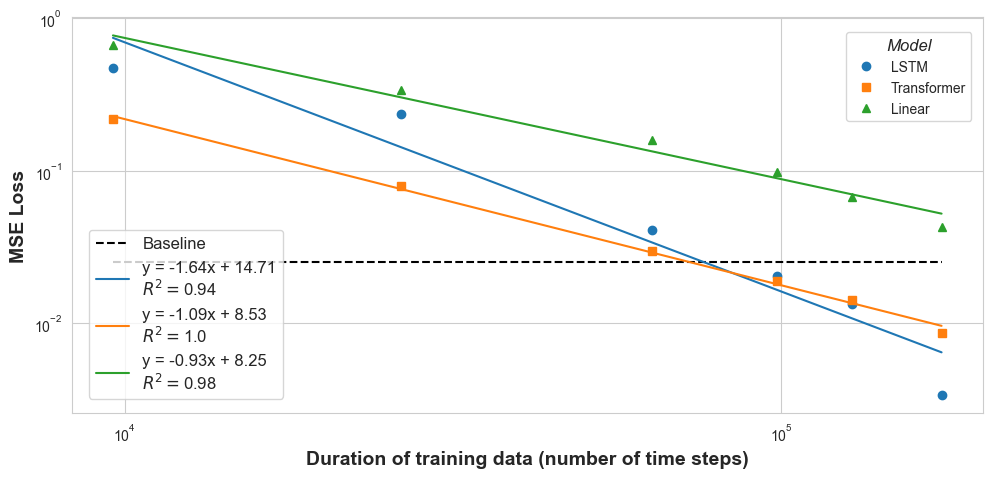

In [6]:
iclr_path = '/home/lrvnc/Projects/worm-graph/logs/results/ICLR'
new_iclr_path = '/home/lrvnc/Projects/worm-graph/logs/results/RERUN_ICLR'

experiment_log_folders = [
    os.path.join(new_iclr_path, 'NTS_LSTM'),
    os.path.join(new_iclr_path, 'NTS_TRANSFORMER'),
    os.path.join(new_iclr_path, 'NTS_LINEAR'),
]

model_names = ['LSTM', 'Transformer', 'Linear']

data_scaling(experiment_log_folders=experiment_log_folders, model_names=model_names, legend_code=legend_code)

# Hidden scaling

/home/lrvnc/Projects/worm-graph/visualize/_utils.py:1043: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/home/lrvnc/Projects/worm-graph/visualize/_utils.py:1043: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


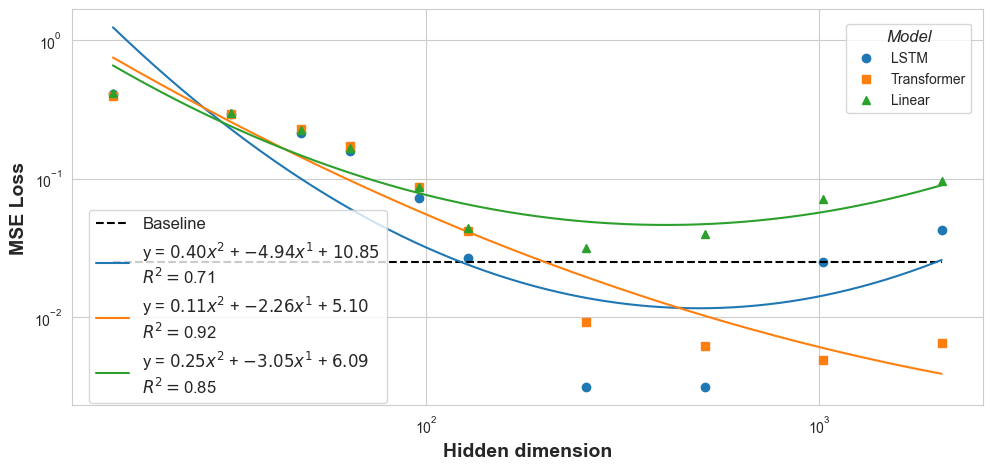

In [7]:
iclr_path = '/home/lrvnc/Projects/worm-graph/logs/results/ICLR'
new_iclr_path = '/home/lrvnc/Projects/worm-graph/logs/results/RERUN_ICLR'

experiment_log_folders = [
    os.path.join(new_iclr_path, 'HIDDEN_LSTM'),
    os.path.join(new_iclr_path, 'HIDDEN_TRANSFORMER'),
    os.path.join(new_iclr_path, 'HIDDEN_LINEAR'),
]

model_names = ['LSTM', 'Transformer', 'Linear']

hidden_scaling(experiment_log_folders=experiment_log_folders, model_names=model_names, legend_code=legend_code)

# Data scaling slopes

/home/lrvnc/Projects/worm-graph/debugging/leandro/notebooks/iclr.py:619: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  slDF = slDF.append({'model': model, 'dataset': dataset, 'slope': slope,
/home/lrvnc/Projects/worm-graph/debugging/leandro/notebooks/iclr.py:619: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  slDF = slDF.append({'model': model, 'dataset': dataset, 'slope': slope,
/home/lrvnc/Projects/worm-graph/debugging/leandro/notebooks/iclr.py:619: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  slDF = slDF.append({'model': model, 'dataset': dataset, 'slope': slope,
/home/lrvnc/Projects/worm-graph/debugging/leandro/notebooks/iclr.py:619: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

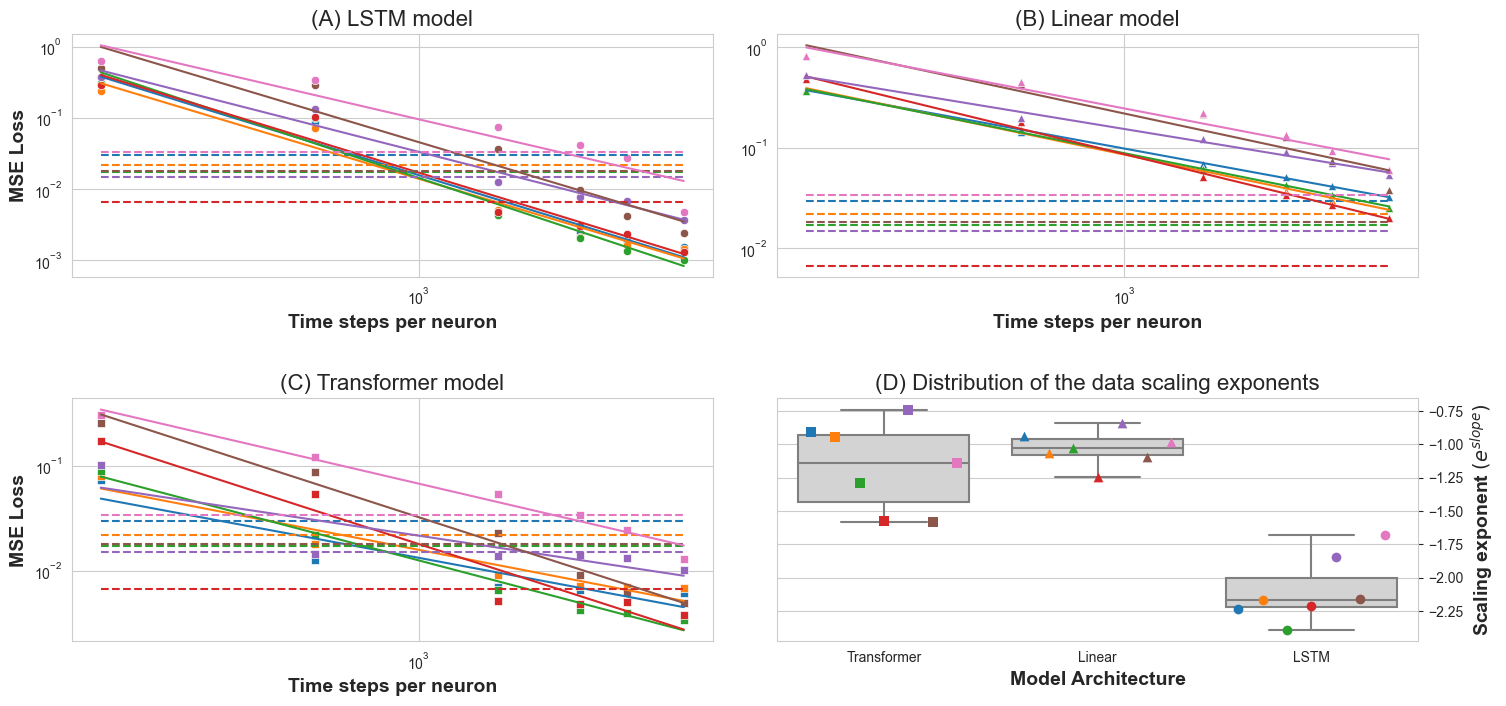

In [8]:
iclr_path = '/home/lrvnc/Projects/worm-graph/logs/results/ICLR'
new_iclr_path = '/home/lrvnc/Projects/worm-graph/logs/results/RERUN_ICLR'

experiment_log_folders = [
    os.path.join(new_iclr_path, 'NTS_LSTM'),
    os.path.join(new_iclr_path, 'NTS_TRANSFORMER'),
    os.path.join(new_iclr_path, 'NTS_LINEAR'),
]

model_names = ['LSTM', 'Transformer', 'Linear']

losses, slDF = data_scaling_slopes(experiment_log_folders=experiment_log_folders, model_names=model_names, legend_code=legend_code)

## Predictions

/home/lrvnc/Projects/worm-graph/debugging/leandro/notebooks/iclr.py:924: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


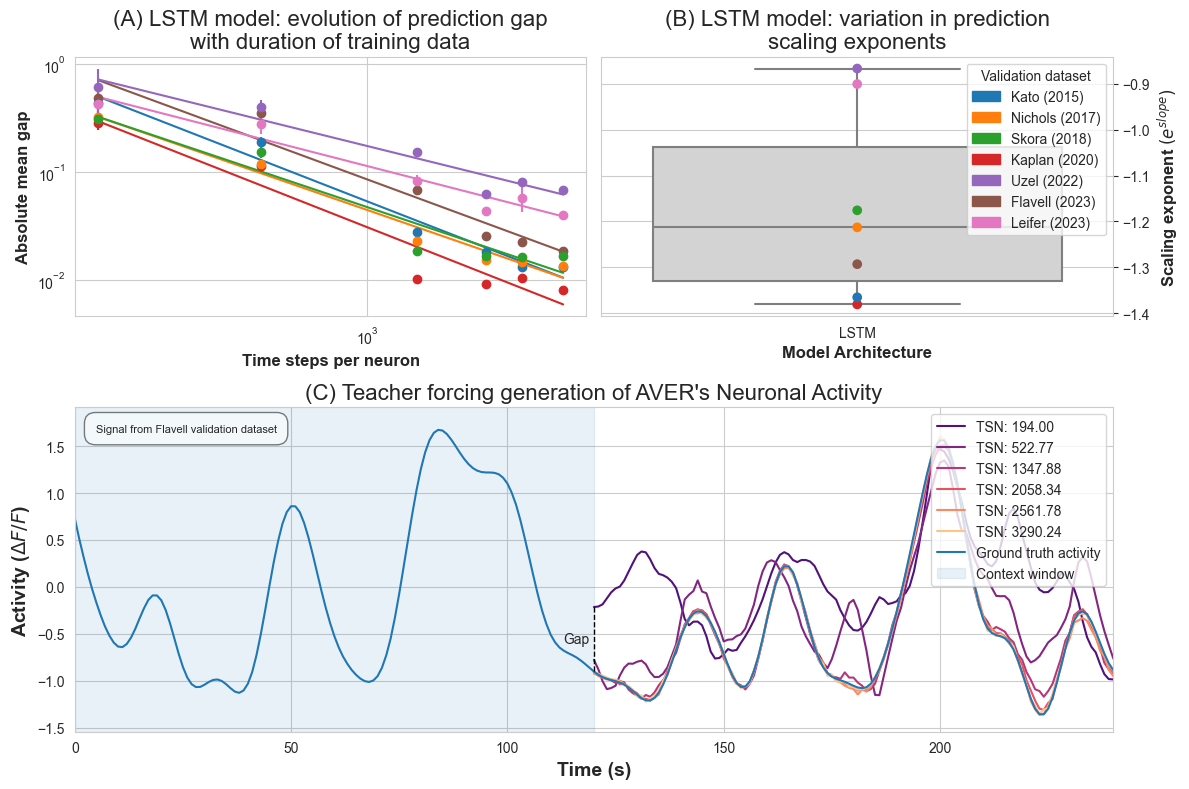

In [23]:
pred_gap_df = prediction_gap(exp_nts_log_dir=os.path.join(new_iclr_path, 'NTS_LSTM_1'), legend_code=legend_code,
                             neuronID='AVER', wormID='worm1', datasetID='Flavell2023')

# Predictions

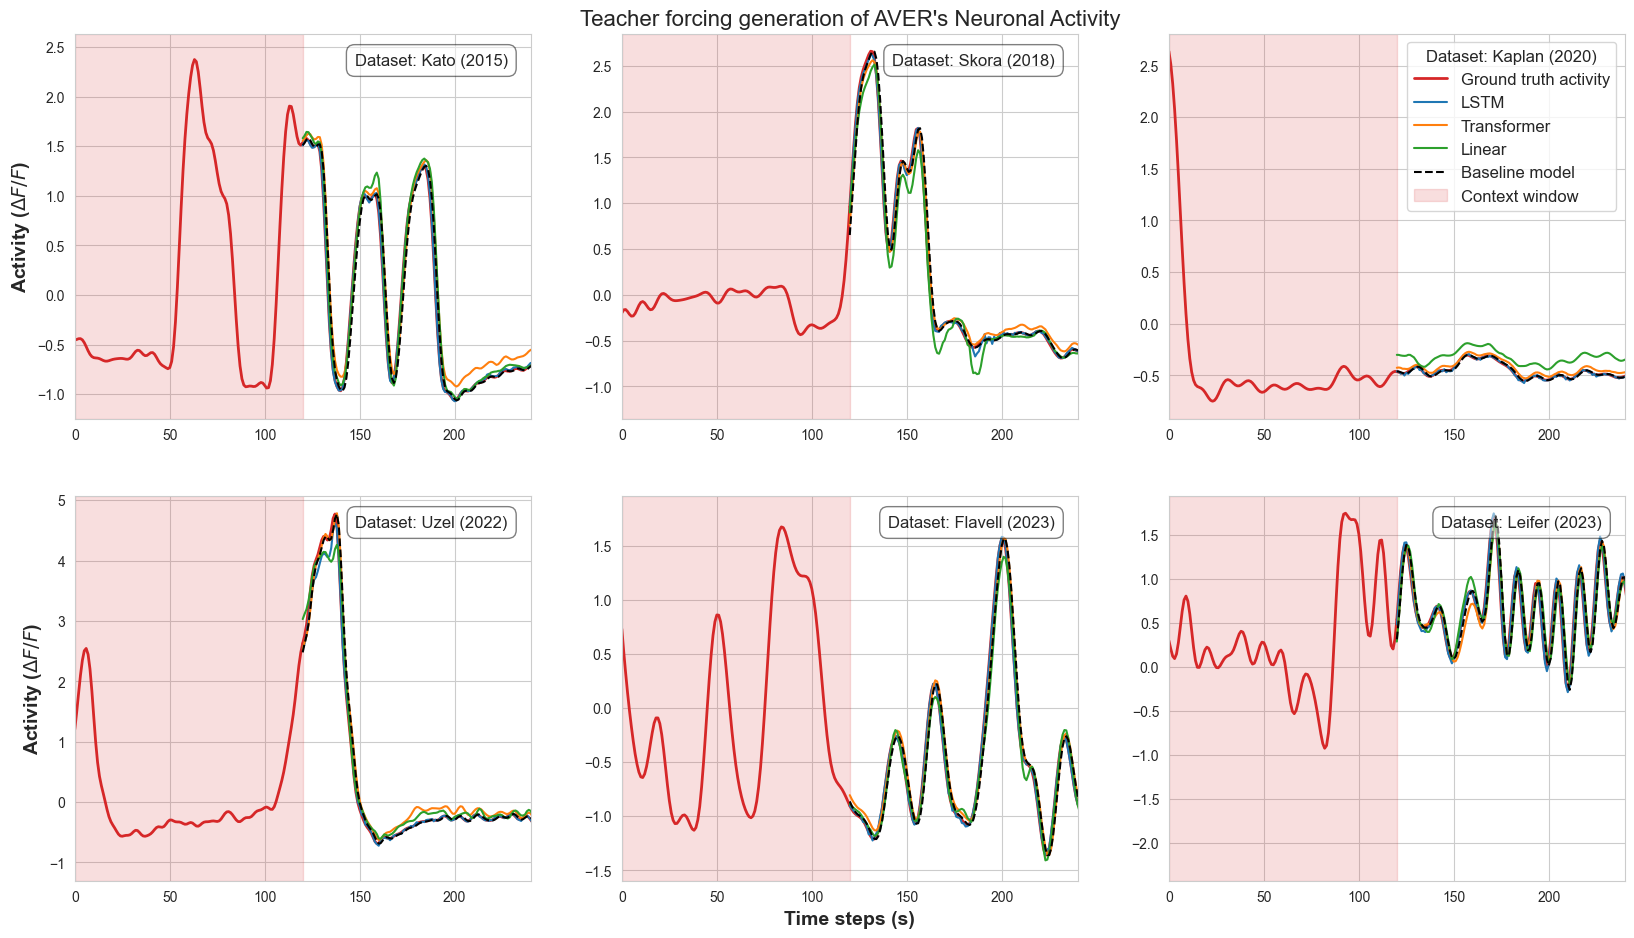

In [13]:
iclr_path = '/home/lrvnc/Projects/worm-graph/logs/results/ICLR'
new_iclr_path = '/home/lrvnc/Projects/worm-graph/logs/results/RERUN_ICLR'

experiment_log_folders = [
    os.path.join(new_iclr_path, 'NTS_LSTM_1'),
    os.path.join(new_iclr_path, 'NTS_TRANSFORMER_1'),
    os.path.join(new_iclr_path, 'NTS_LINEAR_1'),
]

model_names = ['LSTM', 'Transformer', 'Linear']

#pred_df = predictions(experiment_log_folders=experiment_log_folders, model_names=model_names, legend_code=legend_code)
teacher_forcing(experiment_log_folders=experiment_log_folders, model_names=model_names, legend_code=legend_code)

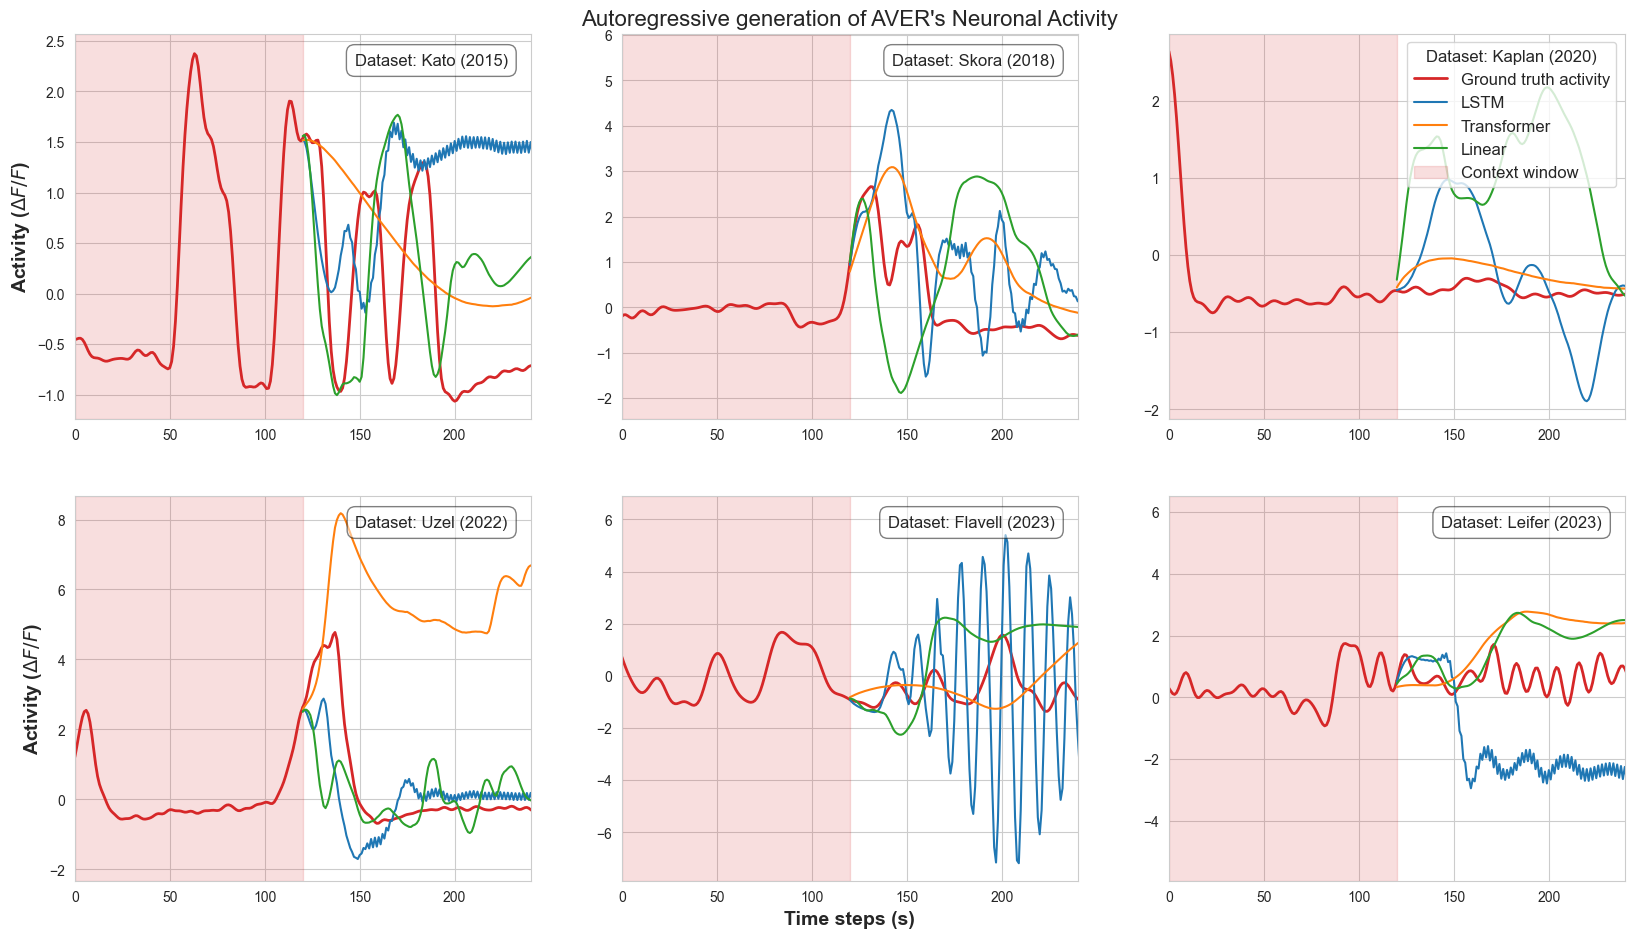

In [12]:
autoregressive(experiment_log_folders=experiment_log_folders, model_names=model_names, legend_code=legend_code)

# Cross dataset

/home/lrvnc/Projects/worm-graph/debugging/leandro/notebooks/iclr.py:1032: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


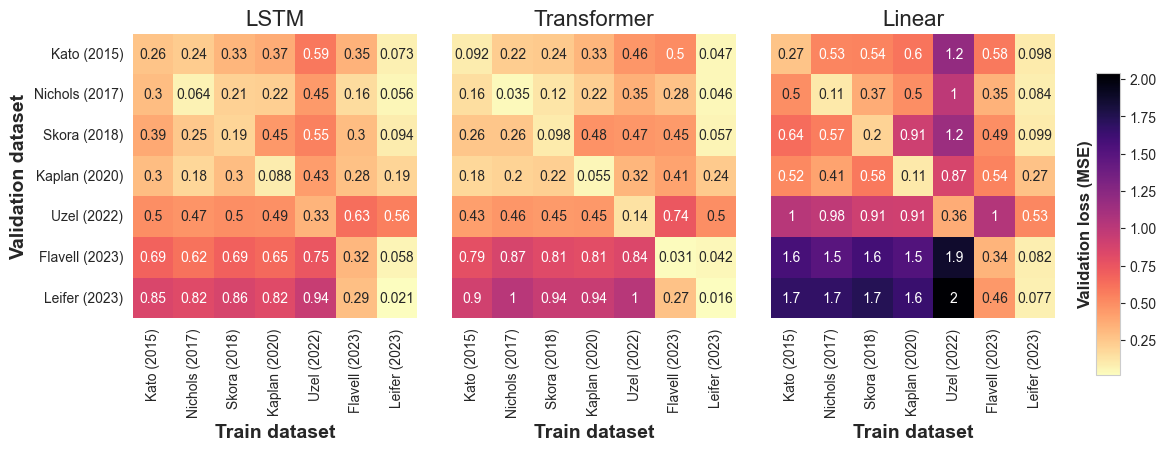

In [33]:
iclr_path = '/home/lrvnc/Projects/worm-graph/logs/results/ICLR'
new_iclr_path = '/home/lrvnc/Projects/worm-graph/logs/results/RERUN_ICLR'

experiment_log_folders = [
    os.path.join(new_iclr_path, 'CDS_LSTM'),
    os.path.join(new_iclr_path, 'CDS_TRANSFORMER'),
    os.path.join(new_iclr_path, 'CDS_LINEAR'),
]

model_names = ['LSTM', 'Transformer', 'Linear']

#pred_df = predictions(experiment_log_folders=experiment_log_folders, model_names=model_names, legend_code=legend_code)
cross_dataset(experiment_log_folders=experiment_log_folders, model_names=model_names, legend_code=legend_code)

# Model Parameters

In [73]:
from prettytable import PrettyTable

def print_parameters(model):
    table = PrettyTable(["Module", "Parameters", "Trainable"])

    total_params = 0
    total_trainable = 0

    for name, parameter in model.named_parameters():
        num_params = torch.prod(torch.tensor(parameter.size())).item()
        total_params += num_params

        trainable = parameter.requires_grad
        if trainable:
            total_trainable += num_params

        table.add_row([name, num_params, trainable])

    print(table)
    print("Total Parameters:", total_params)
    print("Total Trainable Parameters:", total_trainable)

In [91]:
from models._main import get_model
from omegaconf import OmegaConf

model_config = OmegaConf.load('/home/lrvnc/Projects/worm-graph/configs/submodule/model.yaml')

print(type(model).__name__)
model_config.model.use_this_pretrained_model = None
model = get_model(model_config.model)
print_parameters(model)

NeuralTransformer
+-----------------------------------------+------------+-----------+
|                  Module                 | Parameters | Trainable |
+-----------------------------------------+------------+-----------+
|          input_hidden.1.weight          |   86372    |    True   |
|           input_hidden.1.bias           |    286     |    True   |
|  hidden_hidden.self_attn.in_proj_weight |   245388   |    True   |
|   hidden_hidden.self_attn.in_proj_bias  |    858     |    True   |
| hidden_hidden.self_attn.out_proj.weight |   81796    |    True   |
|  hidden_hidden.self_attn.out_proj.bias  |    286     |    True   |
|       hidden_hidden.linear1.weight      |   81796    |    True   |
|        hidden_hidden.linear1.bias       |    286     |    True   |
|       hidden_hidden.linear2.weight      |   81796    |    True   |
|        hidden_hidden.linear2.bias       |    286     |    True   |
|        hidden_hidden.norm1.weight       |    286     |    True   |
|         hidden